# SupplyChain Sales Prediction Model















In [595]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [596]:
df = pd.read_csv("SupplyChainDataset.csv",encoding= 'unicode_escape')

In [597]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [598]:
df.shape

(105122, 53)

In [599]:
df.size

5571466

# missing values

In [600]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        5
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


since the dataset is large, even if we drop rows having missing values it will not make significant difference but before that we need to drop columns 'Order Zipcode' and 'Product Description' which are not significant to our analysis

In [601]:
df.drop(columns= ['Product Description','Order Zipcode'],inplace =True)

In [602]:
df.dropna(inplace=True)

In [603]:
# checking if any null values are present
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [604]:
df.shape

(105113, 51)

In [605]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [606]:
# Removing unneccessary columns

df.drop(columns = [ 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 
                   'Customer Street', 'Customer Zipcode','Latitude', 'Longitude', 'Product Image',
                   'Product Status','shipping date (DateOrders)'],inplace=True)

In [607]:
df.shape

(105113, 40)

In [608]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360.0,73.0,Smart watch,327.75,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360.0,73.0,Smart watch,327.75,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360.0,73.0,Smart watch,327.75,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360.0,73.0,Smart watch,327.75,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360.0,73.0,Smart watch,327.75,Standard Class


# Trend Analysis

In [609]:
from datetime import datetime as dt

In [610]:
df['month_year'] = pd.to_datetime(df['order date (DateOrders)']).dt.to_period('M')

In [611]:
monthdata = df.groupby('month_year')

In [612]:
monthdata.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360.0,73.0,Smart watch,327.750000,Standard Class,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360.0,73.0,Smart watch,327.750000,Standard Class,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360.0,73.0,Smart watch,327.750000,Standard Class,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360.0,73.0,Smart watch,327.750000,Standard Class,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360.0,73.0,Smart watch,327.750000,Standard Class,2018-01
48,PAYMENT,5,2,-30.750000,115.180000,Late delivery,1,17,Cleats,Bayamon,...,-30.750000,South Asia,Uttar Pradesh,PENDING_PAYMENT,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.990002,Second Class,2016-02
49,PAYMENT,2,2,-122.730003,79.180000,Shipping on time,0,29,Shop By Sport,Caguas,...,-122.730003,West Asia,Bursa,PENDING_PAYMENT,627.0,29.0,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Second Class,2016-10
50,PAYMENT,6,2,33.599998,96.000000,Late delivery,1,24,Women's Apparel,Caguas,...,33.599998,Oceania,Australia del Sur,PENDING_PAYMENT,502.0,24.0,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Second Class,2016-03
51,PAYMENT,2,2,24.690001,75.980003,Shipping on time,0,29,Shop By Sport,Caguas,...,24.690001,West Asia,Estambul,PENDING_PAYMENT,627.0,29.0,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Second Class,2016-10
52,PAYMENT,3,2,9.100000,91.000000,Late delivery,1,24,Women's Apparel,Caguas,...,9.100000,Eastern Asia,Ulán Bator,PENDING_PAYMENT,502.0,24.0,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Second Class,2016-11


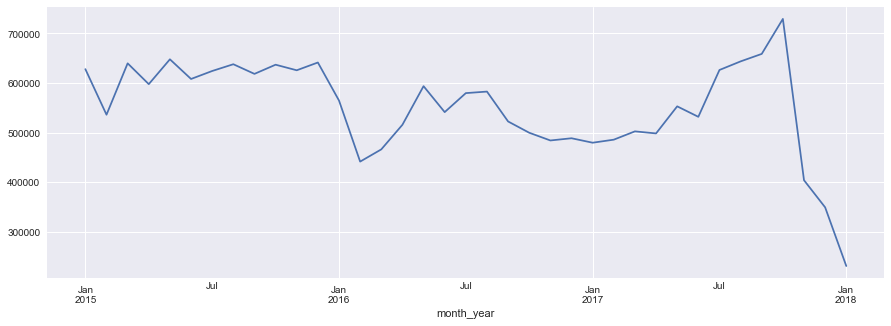

In [613]:
plt.style.use("seaborn")
data = monthdata['Sales'].sum().plot(figsize = (15,5))

# Exploratory Data Analysis (EDA)

As the dataset is of Supply chain, it would be significant to perform trend analysis on scheduled vs on time delivery

In [614]:
df2 = df[['month_year','Days for shipping (real)','Days for shipment (scheduled)']]

In [615]:
df2.rename(columns = {'Days for shipping (real)': 'actual_days_for_shipping', 
            'Days for shipment (scheduled)':'scheduled_days_for_shipping'},inplace=True)

In [616]:
groups = df2.groupby('month_year')

In [617]:
df3  = groups.mean()

In [618]:
df3.reset_index(inplace= True)

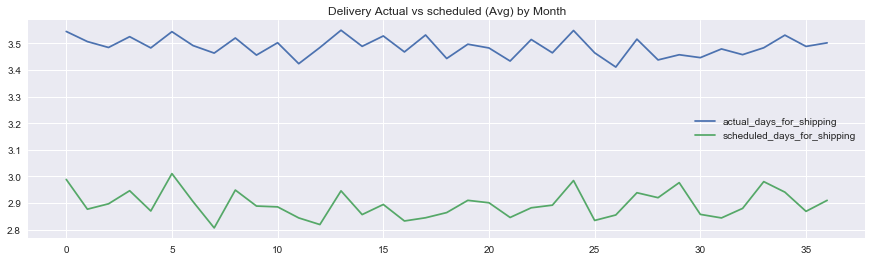

In [619]:
import matplotlib.pyplot as plt
%matplotlib inline

df3.plot(figsize=(15,4),title= 'Delivery Actual vs scheduled (Avg) by Month')


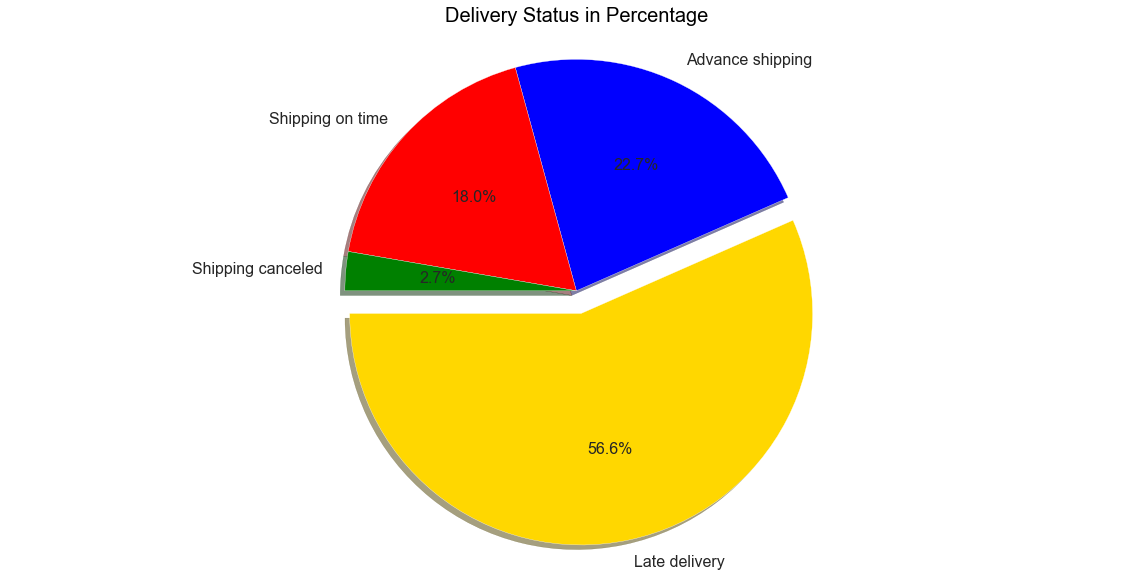

In [620]:
colors = ['gold', 'blue', 'red', 'green']
Piechart = df['Delivery Status'].value_counts().plot.pie(figsize=(20,10),
startangle=180, explode=(0.1,0,0,0),autopct='%1.1f%%',shadow=True,textprops={'fontsize': 16},colors = colors)
plt.title("Delivery Status in Percentage ",size=20,color='black') 
plt.ylabel(" ")
Piechart.axis('equal') 
plt.show()


In [621]:
# Let us explore the regions with the most late delivery
lateDeliveryData = df[(df['Delivery Status']) == 'Late delivery']

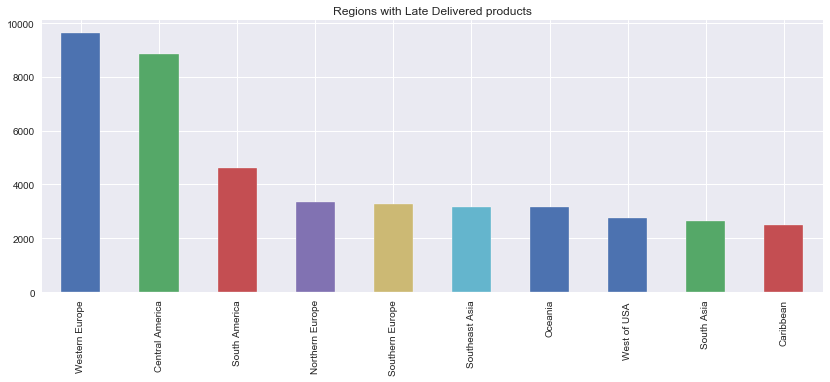

In [622]:
lateDeliveryData['Order Region'].value_counts().nlargest(10).plot.bar(title ='Regions with Late Delivered products',figsize = (14,5))
                                                                    

In [623]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360.0,73.0,Smart watch,327.75,Standard Class,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360.0,73.0,Smart watch,327.75,Standard Class,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360.0,73.0,Smart watch,327.75,Standard Class,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360.0,73.0,Smart watch,327.75,Standard Class,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360.0,73.0,Smart watch,327.75,Standard Class,2018-01


In [624]:
#Market wise sales
#aggregating data
markets = df.groupby('Market')

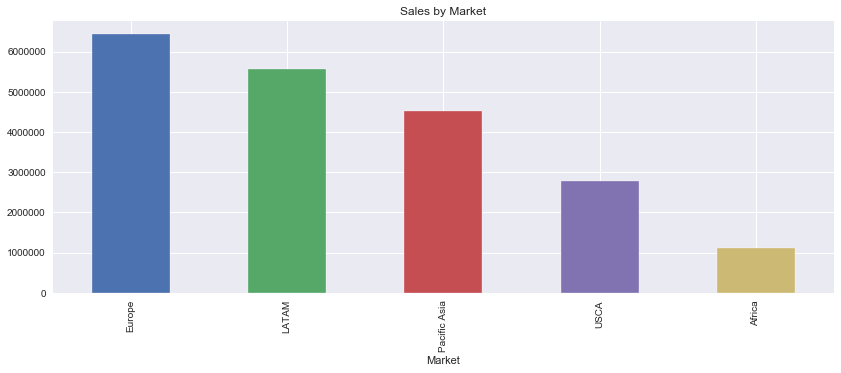

In [625]:
markets['Sales'].sum().sort_values(ascending =False).plot.bar(title = 'Sales by Market',figsize = (14,5))
                                                                                                

In [626]:
# Sales by order Region
regions = df.groupby('Order Region')

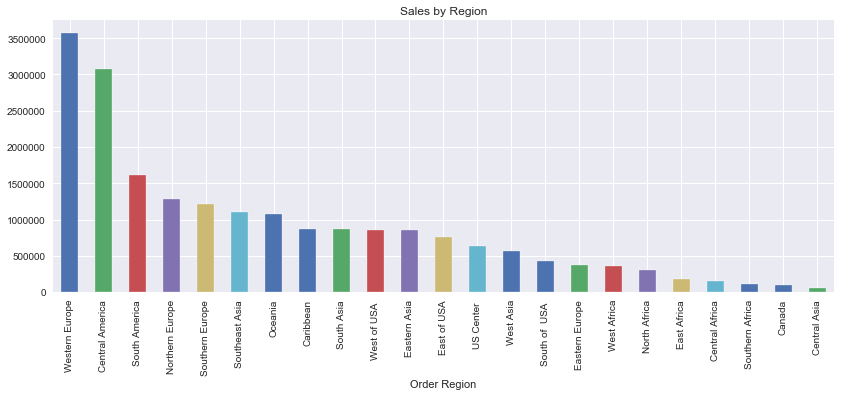

In [627]:
regions['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'Sales by Region',figsize = (14,5))

In [628]:
# Let's explore the Product KPI
# Top 10 Products Sold

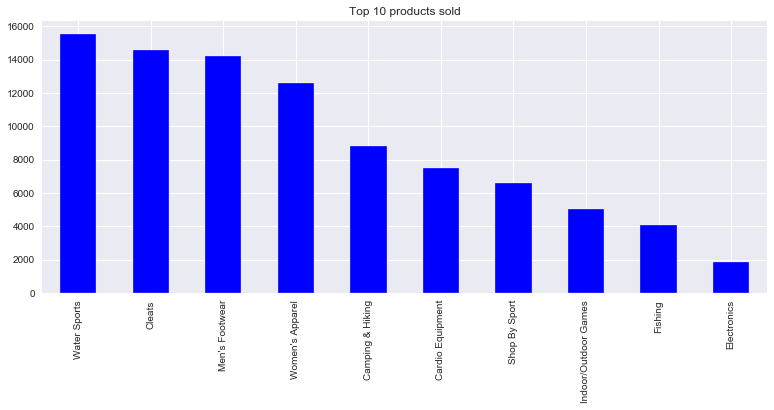

In [629]:
df['Category Name'].value_counts().nlargest(10).plot.bar(title = 'Top 10 products sold', figsize = (13,5),color = 'blue')

In [630]:
# Least 10 products sold 

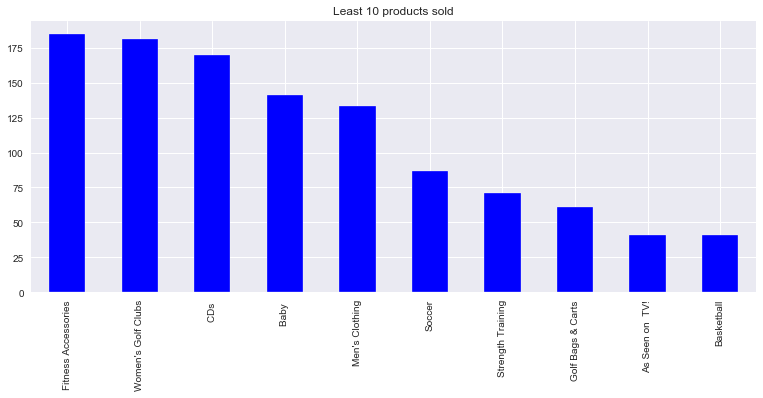

In [631]:
df['Category Name'].value_counts().nsmallest(10).sort_values(ascending=False).plot.bar(title = 
                                                     'Least 10 products sold', figsize = (13,5),color = 'blue')

In [632]:
data = df[(df['Benefit per order']< 0)] # filtering data with transactions having loss

In [633]:
groups = data.groupby('Category Name')

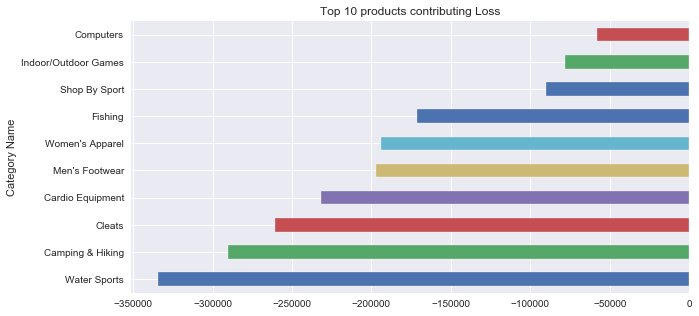

In [634]:
groups['Benefit per order'].sum().sort_values(ascending = True).nsmallest(10).plot.barh(title = 
                                                     'Top 10 products contributing Loss', figsize = (10,5))

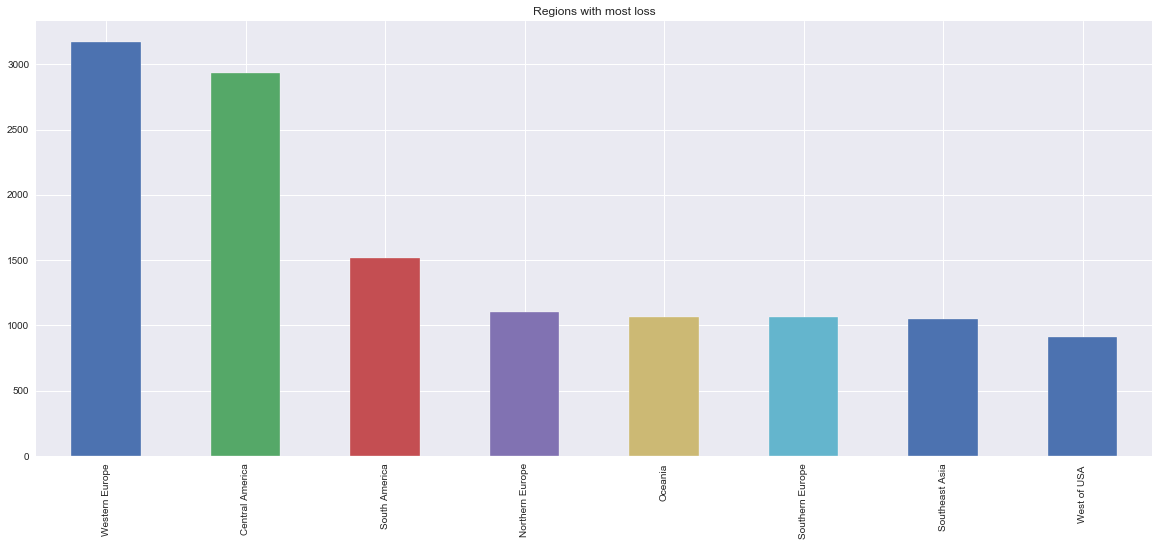

In [635]:
# which regions have the most loss
data['Order Region'].value_counts().nlargest(8).plot.bar(figsize=(20,8), title="Regions with most loss")

In [636]:
# However, we also have fraud transactions in the data that might have cause losses. Let's explore those transactions.
df['Order Status'].value_counts()

COMPLETE           41477
PENDING_PAYMENT    23800
CLOSED             13170
PROCESSING          8424
PENDING             7495
ON_HOLD             6764
SUSPECTED_FRAUD     1470
CANCELED            1388
PAYMENT_REVIEW      1125
Name: Order Status, dtype: int64

In [637]:
fraudData = df[df['Order Status'] == 'SUSPECTED_FRAUD']

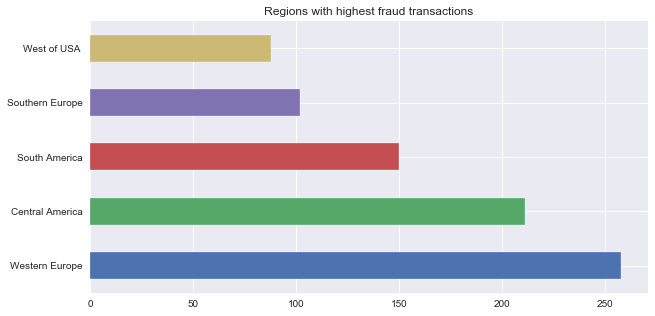

In [638]:
# top 5 regions with fraud transaction
fraudData['Order Region'].value_counts().nlargest(5).plot.barh(title= 'Regions with highest fraud transactions',figsize = (10,5))

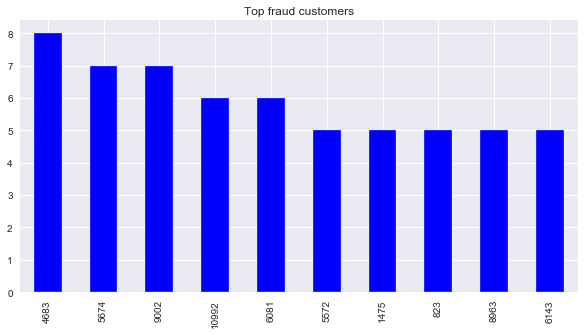

In [639]:
# customers with freaud tranctions
fraudData['Customer Id'].value_counts().nlargest(10).sort_values(ascending = False).plot.bar(title= 
                            'Top fraud customers',figsize = (10,5), color = 'blue')

In [640]:
fraudData['Type'].value_counts()

TRANSFER    1470
Name: Type, dtype: int64

# Correlation Matrix

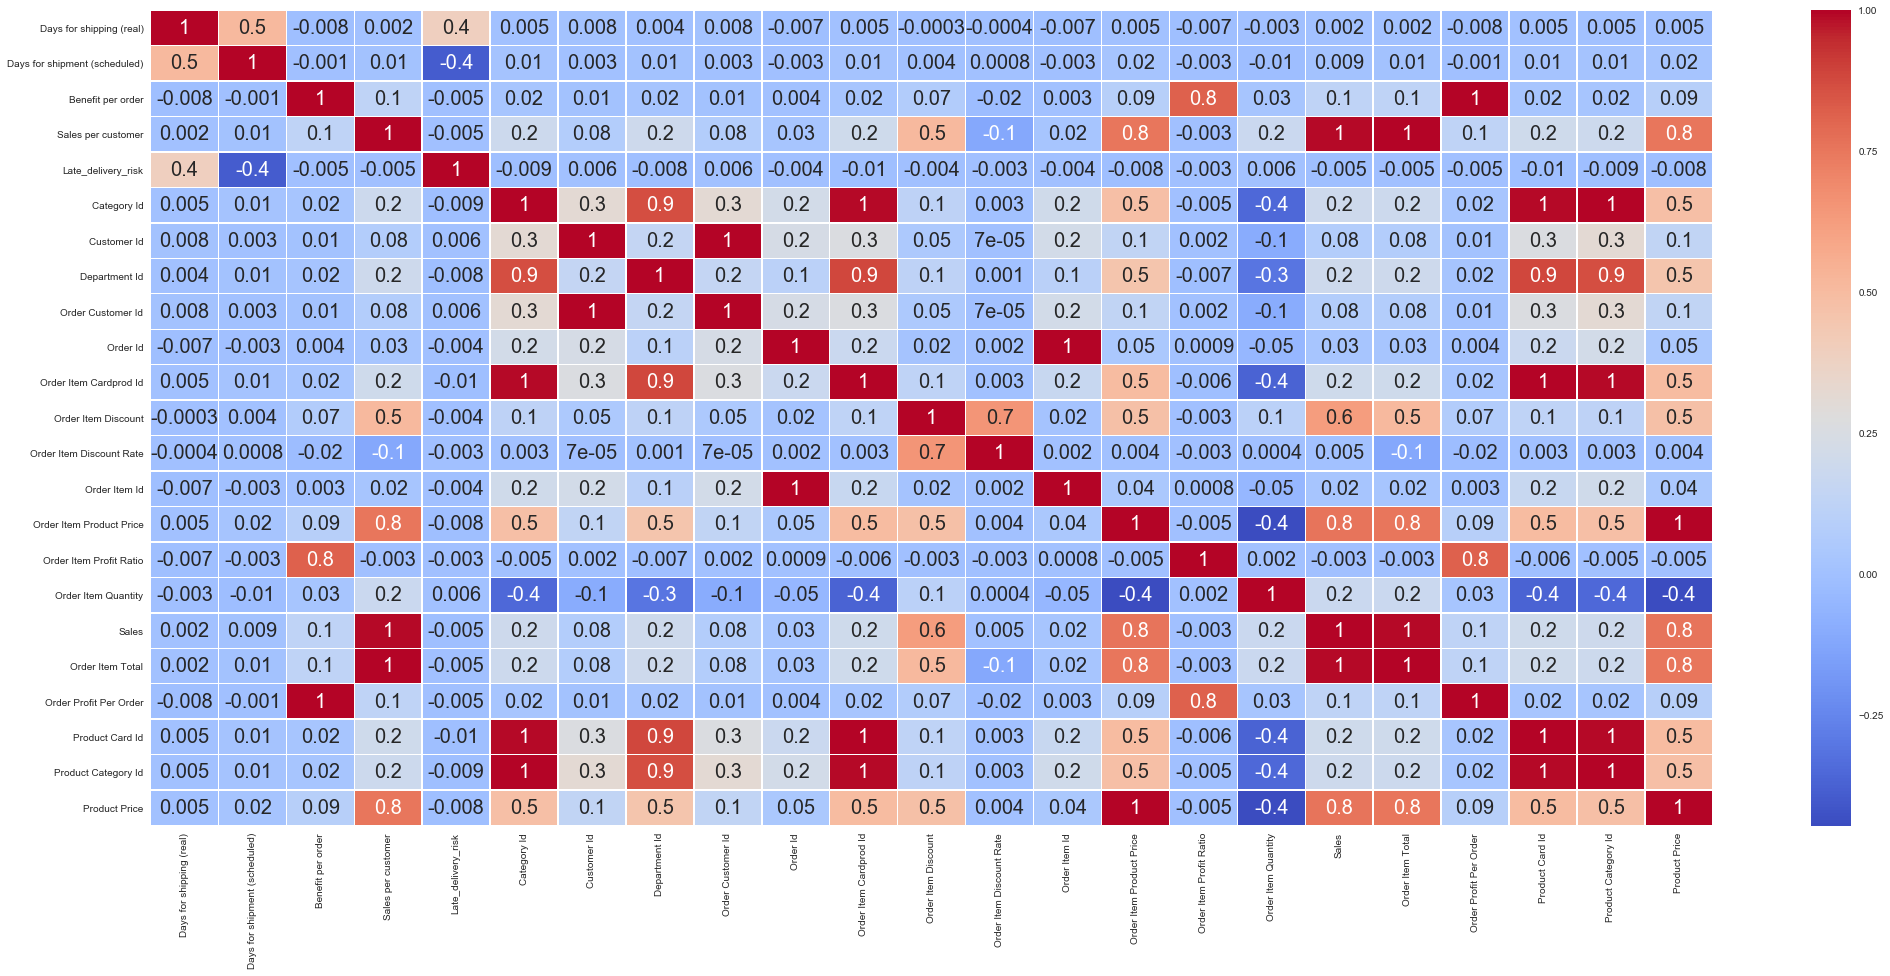

In [641]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(35,15)) 

sns.heatmap(df.corr(),annot=True,linewidths=.4,fmt='.1g',cmap= "coolwarm",annot_kws={"size":20})

In [642]:
df.drop(columns= ['Product Category Id', 'Order Customer Id', 'Order Item Cardprod Id', 
        'Product Card Id','Order Profit Per Order','Order Item Total',
     'Order Item Product Price','order date (DateOrders)','month_year','Days for shipping (real)','Days for shipment (scheduled)'],inplace = True,axis =1)

In [643]:
# creating columns with late delivery status and fraud transaction

df['fraud'] = np.where(df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

df['late_delivery'] = np.where(df['Delivery Status'] == 'Late delivery', 1, 0)

In [644]:
# dropping unneccessary columns
df.drop(columns = ['Delivery Status','Late_delivery_risk','Order Status'],axis = 1,inplace = True)

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105113 entries, 0 to 105120
Data columns (total 29 columns):
Type                        105113 non-null object
Benefit per order           105113 non-null float64
Sales per customer          105113 non-null float64
Category Id                 105113 non-null int64
Category Name               105113 non-null object
Customer City               105113 non-null object
Customer Country            105113 non-null object
Customer Id                 105113 non-null int64
Customer Segment            105113 non-null object
Customer State              105113 non-null object
Department Id               105113 non-null int64
Department Name             105113 non-null object
Market                      105113 non-null object
Order City                  105113 non-null object
Order Country               105113 non-null object
Order Id                    105113 non-null int64
Order Item Discount         105113 non-null float64
Order Item Discount Rat

# Label Encoding

In [646]:
# Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# we need to label encode categorical variables

df['Customer Country']  = le.fit_transform(df['Customer Country'])
df['Market']            = le.fit_transform(df['Market'])
df['Type']              = le.fit_transform(df['Type'])
df['Product Name']      = le.fit_transform(df['Product Name'])
df['Customer Segment']  = le.fit_transform(df['Customer Segment'])
df['Customer State']    = le.fit_transform(df['Customer State'])
df['Order Region']      = le.fit_transform(df['Order Region'])
df['Order City']        = le.fit_transform(df['Order City'])
df['Category Name']     = le.fit_transform(df['Category Name'])
df['Customer City']     = le.fit_transform(df['Customer City'])
df['Department Name']   = le.fit_transform(df['Department Name'])
df['Order State']       = le.fit_transform(df['Order State'])
df['Shipping Mode']     = le.fit_transform(df['Shipping Mode'])
df['Order Country']     = le.fit_transform(df['Order Country'])



# Data Modelling

In [647]:
#train-test split
x = df.loc[:, df.columns != 'Sales']
y = df['Sales']
from sklearn.model_selection import train_test_split


In [648]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state= 11)

In [649]:
x_train.shape

(73579, 28)

In [650]:
x_test.shape

(31534, 28)

In [651]:
# Scaling for regression models
from sklearn.preprocessing import MinMaxScaler

In [652]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression

In [653]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [654]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [655]:
y_predict = model.predict(x_test)

In [656]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_predict)

0.9999999998863325

In [657]:
mean_squared_error(y_test,y_predict)

1.887027102914115e-06

In [658]:
mean_absolute_error(y_test,y_predict)

0.00048032262526858375

# Lasso Regression

In [659]:

from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.1)

In [660]:
model.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [661]:
y_predict = model.predict(x_test)

In [662]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_predict)

0.9994543343016431

In [663]:
mean_squared_error(y_test,y_predict)

9.058748535973281

In [664]:
mean_absolute_error(y_test,y_predict)

1.6478562342191971

# Ridge Regression

In [665]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.1)

In [666]:
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [667]:
r_squared = r2_score(y_test,y_predict)

In [668]:
r_squared

0.9999985125280667

In [669]:
mean_squared_error(y_test,y_predict)

0.02469393666901282

In [670]:
mean_absolute_error(y_test,y_predict)

0.0898655405430673

# DecisionTree Regressor

In [671]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [672]:
r2_score(y_test,y_predict)

0.9999490689652866

In [673]:
mean_absolute_error(y_test,y_predict)

0.025043447756706517

In [674]:
mean_squared_error(y_test,y_predict)

0.8455203204727846

# Random Forest regressor

In [675]:

from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators = 100,max_depth = 10, random_state = 50)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [676]:
r2_score(y_test,y_predict)

0.9998177190304178

In [677]:
mean_absolute_error(y_test,y_predict)

0.24522672976548954

In [678]:
mean_squared_error(y_test,y_predict)

3.0260972447231227

# Model Evaluation

In [679]:
ModelEval = { 'Regressor' : ['Linear','Lasso','Ridge','DecisionTree','RandomForest'],
            'R_squared':[0.9999,0.9999,0.9999,0.9999,0.9981],
            'RMSE' : [1.8870,9.0587,0.02469,0.8852,3.0260],
            'MAE' : [0.0004,1.6478,0.0898,0.0217,0.2452]}

In [680]:
evaluation_matrix = pd.DataFrame(ModelEval,columns = ['Regressor','R_squared','RMSE','MAE'])

In [681]:
evaluation_matrix

,Regressor,R_squared,RMSE,MAE
0,Linear,0.9999,1.88700,0.0004
1,Lasso,0.9999,9.05870,1.6478
2,Ridge,0.9999,0.02469,0.0898
3,DecisionTree,0.9999,0.88520,0.0217
4,RandomForest,0.9981,3.02600,0.2452


# Late Delivery Detection

In [682]:
x = df.loc[:, df.columns != 'late_delivery']
y = df['late_delivery']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 11)

In [683]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [684]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)

In [685]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_predict)

0.8121105455929221

In [686]:
confusion_matrix(y_test,y_predict)

array([[ 7071,  1979],
       [ 1971, 10002]], dtype=int64)

In [687]:
print(classification_report(y_test, y_predict, labels=[1, 2, 3]))
import warnings
warnings.simplefilter("ignore")

              precision    recall  f1-score   support

           1       0.83      0.84      0.84     11973
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.83      0.84      0.84     11973
   macro avg       0.28      0.28      0.28     11973
weighted avg       0.83      0.84      0.84     11973



In [688]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier(n_estimators = 100,max_depth = 10, random_state = 50)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)


In [689]:
accuracy_score(y_test,y_predict)

0.7045141036008181

In [690]:
confusion_matrix(y_test,y_predict)

array([[7556, 1494],
       [4718, 7255]], dtype=int64)

In [691]:
print(classification_report(y_test, y_predict, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.83      0.61      0.70     11973
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.83      0.61      0.70     11973
   macro avg       0.28      0.20      0.23     11973
weighted avg       0.83      0.61      0.70     11973



In [692]:
import xgboost as xgb
model =  xgb.XGBClassifier()
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)

[18:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [693]:
accuracy_score(y_test,y_predict)

0.7413784902249917

In [694]:
print(classification_report(y_test, y_predict, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.84      0.67      0.75     11973
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.84      0.67      0.75     11973
   macro avg       0.28      0.22      0.25     11973
weighted avg       0.84      0.67      0.75     11973

